In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [21]:
df = pd.read_json("Documents/20km.json")

In [22]:
df = pd.json_normalize(df["Matches"])

In [23]:
df.head()

,open,nom,prenom,groupe,sexe,code,localite,province,categ,naissance,...,x_10k,x_15k,x_time,x_avg,pos_categ,pos_sexe,x_sexe,city,sH_Diplome,sH_RTV
0,HEART HEROES,PAQUET,Amaury,1,M,,,,SEH,23/05/1992,...,0:29:33,,1:00:15,20.31,1,1,M,,https://prod.chronorace.be/classements/classem...,Rkw6MzI0MTg5NTEgMjAgMTU6I0xFRlR8MTBSOjMwNTc2Mj...
1,HEART HEROES,SCHYNS,Nicolas,1,M,,,,SEH,10/07/1991,...,0:29:39,,1:01:41,19.84,2,2,M,,https://prod.chronorace.be/classements/classem...,Rkw6MzI1MDQ0OTQgMjAgMTU6I0xFRlR8MTBSOjMwNTgyMz...
2,,BELAYNEH,Solomon,1,M,1020,BRUXELLES,,SEH,28/03/1996,...,0:29:38,,1:01:43,19.83,3,3,M,BRUXELLES,https://prod.chronorace.be/classements/classem...,Rkw6MzI1MDYzNzggMjAgMTU6I0xFRlR8MTBSOjMwNTgxMz...
3,RESC,BOUCHIKHI,Lahsene,1,M,2000,ANTWERPEN,Anvers,SEH,01/06/1993,...,0:29:39,,1:02:04,19.72,4,4,M,ANTWERPEN,https://prod.chronorace.be/classements/classem...,Rkw6MzI1Mjc3OTAgMjAgMTU6I0xFRlR8MTBSOjMwNTgyMD...
4,STIB - MIVB,PAUL,Romain,1,M,1325,CHAUMONT-GISTOUX,Brabant wallon,SEH,12/02/1993,...,0:30:04,,1:02:05,19.71,5,5,M,CHAUMONT-GISTOUX,https://prod.chronorace.be/classements/classem...,Rkw6MzI1Mjg5NDEgMjAgMTU6I0xFRlR8MTBSOjMwNjA3ND...


In [24]:
df["time_seconds"] = pd.to_timedelta(df['x_time'].fillna('00:00:00'), errors='coerce')
df["time_seconds"] = df['time_seconds'].dt.total_seconds()

In [25]:
df.head()

,open,nom,prenom,groupe,sexe,code,localite,province,categ,naissance,...,x_15k,x_time,x_avg,pos_categ,pos_sexe,x_sexe,city,sH_Diplome,sH_RTV,time_seconds
0,HEART HEROES,PAQUET,Amaury,1,M,,,,SEH,23/05/1992,...,,1:00:15,20.31,1,1,M,,https://prod.chronorace.be/classements/classem...,Rkw6MzI0MTg5NTEgMjAgMTU6I0xFRlR8MTBSOjMwNTc2Mj...,3615.0
1,HEART HEROES,SCHYNS,Nicolas,1,M,,,,SEH,10/07/1991,...,,1:01:41,19.84,2,2,M,,https://prod.chronorace.be/classements/classem...,Rkw6MzI1MDQ0OTQgMjAgMTU6I0xFRlR8MTBSOjMwNTgyMz...,3701.0
2,,BELAYNEH,Solomon,1,M,1020,BRUXELLES,,SEH,28/03/1996,...,,1:01:43,19.83,3,3,M,BRUXELLES,https://prod.chronorace.be/classements/classem...,Rkw6MzI1MDYzNzggMjAgMTU6I0xFRlR8MTBSOjMwNTgxMz...,3703.0
3,RESC,BOUCHIKHI,Lahsene,1,M,2000,ANTWERPEN,Anvers,SEH,01/06/1993,...,,1:02:04,19.72,4,4,M,ANTWERPEN,https://prod.chronorace.be/classements/classem...,Rkw6MzI1Mjc3OTAgMjAgMTU6I0xFRlR8MTBSOjMwNTgyMD...,3724.0
4,STIB - MIVB,PAUL,Romain,1,M,1325,CHAUMONT-GISTOUX,Brabant wallon,SEH,12/02/1993,...,,1:02:05,19.71,5,5,M,CHAUMONT-GISTOUX,https://prod.chronorace.be/classements/classem...,Rkw6MzI1Mjg5NDEgMjAgMTU6I0xFRlR8MTBSOjMwNjA3ND...,3725.0


In [26]:
date_df = df["naissance"].str.split('/', expand=True)


In [27]:
df["annee_de_naissance"] = date_df[2]

In [28]:
df.drop("sH_RTV", axis=1, inplace=True)
df.drop("sH_Diplome", axis=1, inplace=True)
df.drop("pos_sexe", axis=1, inplace=True)
df.drop("pos_categ", axis=1, inplace=True)
df.drop("open", axis=1, inplace=True)
df.drop("categ", axis=1, inplace=True)

df = df.sort_values("annee_de_naissance", ascending=False)
df.head()


,nom,prenom,groupe,sexe,code,localite,province,naissance,sH_Photo,x_pos,...,Team,x_5k,x_10k,x_15k,x_time,x_avg,x_sexe,city,time_seconds,annee_de_naissance
11843,CATTEAU,Marjorie,1,F,59200,TOURCOING,,25/02/7981,"http://www.sportograf.de/01,11612,9691.html",11844.,...,,,0:56:05,,1:52:46,10.85,F,TOURCOING,6766.0,7981
2681,DERU,Christophe,1,M,1070,ANDERLECHT,Bruxelles-Capitale,25/05/2023,"http://www.sportograf.de/01,5750,9691.html",2682.,...,,,0:43:21,,1:32:39,13.21,M,ANDERLECHT,5559.0,2023
37034,TOUSSAINT,Pauline,1,F,NaN,NaN,,04/04/2022,"http://www.sportograf.de/01,3217,9691.html",-,...,MUCO,,,,-,NaN,F,NaN,NaN,2022
13646,O'SULLIVAN,Benjamin,1,M,1170,BRUSSELS,,14/01/2022,"http://www.sportograf.de/01,28345,9691.html",13647.,...,MHE,,0:54:23,,1:55:53,10.56,M,BRUSSELS,6953.0,2022
25522,JABLONSKA,Eliza,1,F,1050,ELSENE,Bruxelles-Capitale,28/03/2022,"http://www.sportograf.de/01,40540,9691.html",25523.,...,VUB,,1:11:44,,2:21:12,8.67,F,ELSENE,8472.0,2022


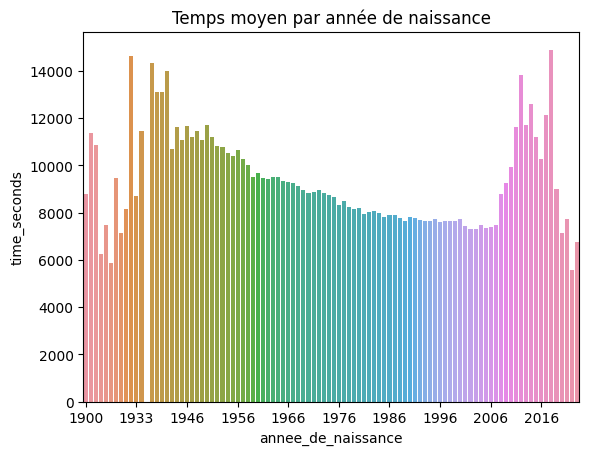

In [29]:
# Calculate the average time by age
average_time = df.groupby('annee_de_naissance')['time_seconds'].mean().reset_index()

# Plot the average times using Seaborn
sns.barplot(data=average_time, x='annee_de_naissance', y='time_seconds')

# Add labels and title
plt.xlabel('Annee de naissance')
plt.ylabel('Temps moyen')
plt.title('Temps moyen par année de naissance')
ax = sns.barplot(data=average_time, x='annee_de_naissance', y='time_seconds')
ax.set_xticks(range(0, len(average_time['annee_de_naissance']), 10))


# Show the plot
plt.show()

In [30]:
df["annee_de_naissance"] = pd.to_numeric(df['annee_de_naissance'])
df_1979 = df[df['annee_de_naissance'] == 1979].dropna(subset=['time_seconds'])
df_1979
df_1979_M = df_1979[df['sexe'] == "M"]

df["annee_de_naissance"] = pd.to_numeric(df['annee_de_naissance'])
df_1972 = df[df['annee_de_naissance'] == 1972].dropna(subset=['time_seconds'])
df_1972
df_1972_F = df_1972[df['sexe'] == "F"]

df["annee_de_naissance"] = pd.to_numeric(df['annee_de_naissance'])
df_1973 = df[df['annee_de_naissance'] == 1973].dropna(subset=['time_seconds'])
df_1973
df_1973_F = df_1973[df['sexe'] == "F"]

/var/folders/gp/x6h08gxx68v_7yw_n701bxz40000gn/T/ipykernel_13787/124267334.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1979_M = df_1979[df['sexe'] == "M"]
/var/folders/gp/x6h08gxx68v_7yw_n701bxz40000gn/T/ipykernel_13787/124267334.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1972_F = df_1972[df['sexe'] == "F"]
/var/folders/gp/x6h08gxx68v_7yw_n701bxz40000gn/T/ipykernel_13787/124267334.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1973_F = df_1973[df['sexe'] == "F"]


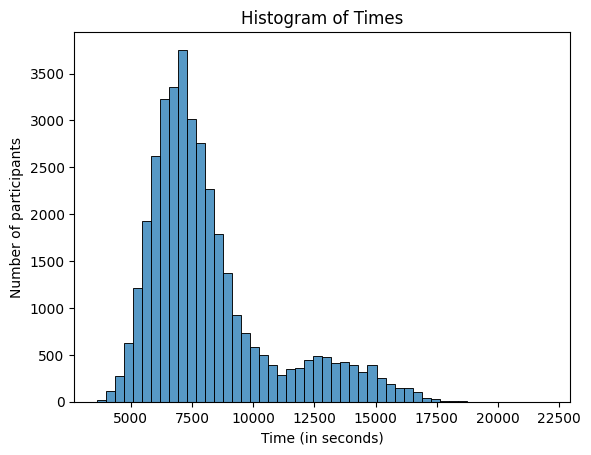

In [31]:
sns.histplot(data=df, x='time_seconds', bins=50)

# Add labels and title
plt.xlabel('Time (in seconds)')
plt.ylabel('Number of participants')
plt.title('Histogram of Times')

# Show the plot
plt.show()

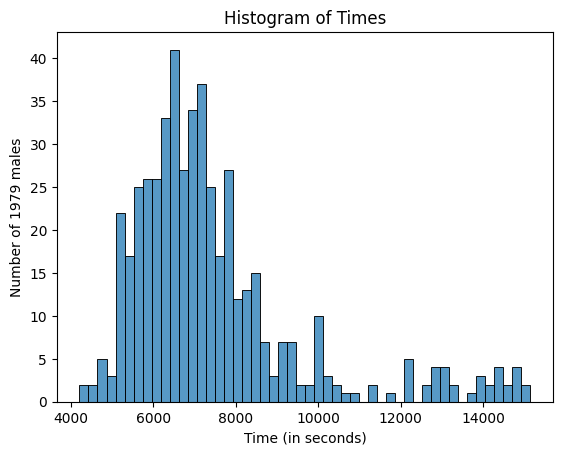

In [32]:
sns.histplot(data=df_1979_M, x='time_seconds', bins=50)

# Add labels and title
plt.xlabel('Time (in seconds)')
plt.ylabel('Number of 1979 males')
plt.title('Histogram of Times')

# Show the plot
plt.show()

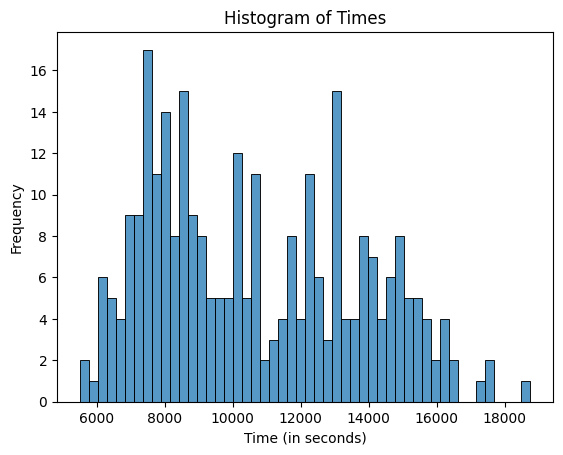

In [33]:
sns.histplot(data=df_1972_F, x='time_seconds', bins=50)

# Add labels and title
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Times')

# Show the plot
plt.show()

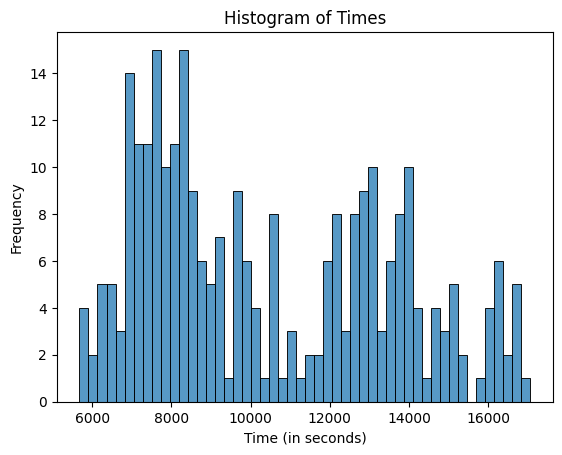

In [34]:
sns.histplot(data=df_1973_F, x='time_seconds', bins=50)

# Add labels and title
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Times')

# Show the plot
plt.show()

In [35]:
df_1979[df_1979["nom"] == "COLOT"]

,nom,prenom,groupe,sexe,code,localite,province,naissance,sH_Photo,x_pos,...,Team,x_5k,x_10k,x_15k,x_time,x_avg,x_sexe,city,time_seconds,annee_de_naissance
25661,COLOT,Julien,1,M,1040,ETTERBEEK,Bruxelles-Capitale,26/08/1979,"http://www.sportograf.de/01,20681,9691.html",25662.,...,,,1:08:14,,2:21:34,8.65,M,ETTERBEEK,8494.0,1979.0


In [36]:
df_1972_F[df_1972_F["nom"] == "VOITURON"]

,nom,prenom,groupe,sexe,code,localite,province,naissance,sH_Photo,x_pos,...,Team,x_5k,x_10k,x_15k,x_time,x_avg,x_sexe,city,time_seconds,annee_de_naissance


In [37]:
df_1973_F[df_1973_F["nom"] == "CHAABANE"]

,nom,prenom,groupe,sexe,code,localite,province,naissance,sH_Photo,x_pos,...,Team,x_5k,x_10k,x_15k,x_time,x_avg,x_sexe,city,time_seconds,annee_de_naissance
29957,CHAABANE,Hanene,1,F,,FANCE ETERBEEK,,08/02/1973,"http://www.sportograf.de/01,20678,9691.html",29958.,...,,,1:17:22,,2:44:16,7.45,F,FANCE ETERBEEK,9856.0,1973.0


In [39]:
df.to_csv("~/20km.csv")